## Online Sales Analysis

### Summary

Here we analyze the <a href="https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data">Online Sales Dataset</a>
from <a href='https://www.kaggle.com/'>Kaggle</a>.

The analysis covers **retrieving data from a database**, **data manipulation**, **computation and visualization**, as well as 
**answering business questions**.

It is primarily based in Python and some SQLite. 

It uses Numpy and Pandas for data manipulation, SQLite3 for accesing the database and Matplotlib and Seaborn for visualizations.

### Dataset Description

The **Online Sales Dataset** provides an overview of global online sales transactions across different product categories. 
The dataset contains **240 observations and 9 attributes**. Each entry contains information about a single transaction. 

**Attribute information**:
- **Transaction ID**: Unique identifier for each sales order.
- **Date**: Date of the sales transaction.
- **Product Category**: Broad category of the product sold (e.g., Electronics, Home Appliances etc.).
- **Product Name**: Specific name or model of the product sold.
- **Units Sold**: Number of units of the product sold in the transaction.
- **Unit Price**: Price of one unit of the product.
- **Total Revenue**: Total revenue generated from the sales transaction (Quantity * Unit Price).
- **Region**: Geographic region where the transaction occurred (e.g., North America, Europe, Asia).
- **Payment Method**: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

### Exploring the database and retrieving the data

The data is stored in a SQLite database **'online_sales.db'**. We'll query the table that contains the 'sales' data. 

In [2]:
# Create a connection to sqlite3 database
conn = sqlite3.connect('online_sales.db')

# Retrieve data
read_data = pd.read_sql_query ('''
                       SELECT
                       *
                       FROM sales''', 
                       conn) 

# Query information from 'sales' table 
pd.read_sql("PRAGMA table_info(sales)", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Transaction_ID,INT,0,None,0
1,1,Date,TEXT,0,None,0
2,2,Product_Category,TEXT,0,None,0
3,3,Product_Name,TEXT,0,None,0
4,4,Units_Sold,INT,0,None,0
5,5,Unit_Price,REAL,0,None,0
6,6,Total_Revenue,REAL,0,None,0
7,7,Region,TEXT,0,None,0
8,8,Payment_Method,TEXT,0,None,0


On each row of the sqlite table it's displayed the **column name**, **data type**, and **constraints** of the data.

In [3]:
# Retrieve data in a pandas dataframe  
df = pd.DataFrame(read_data, columns = 
    ['Transaction_ID', 'Date', 'Product_Category', 
     'Product_Name','Units_Sold', 'Unit_Price', 
     'Total_Revenue', 'Region', 'Payment_Method'])

# Print the shape and the first rows
print(df.shape)
df.head()

(240, 9)


,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,1/1/2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,1/2/2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,1/3/2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,1/4/2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,1/5/2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
# Get columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product_Category  240 non-null    object 
 3   Product_Name      240 non-null    object 
 4   Units_Sold        240 non-null    int64  
 5   Unit_Price        240 non-null    float64
 6   Total_Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment_Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


The dataset has 240 rows and 9 columns. The columns are of integer, float and string types.

In [5]:
# Numerical summary of data
df.describe()

,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


The Total Revenue (Sales) has an average of 336, with a **minim** of 6.5 and a **maxim** of 3900. We observe that **75% of 
sales** are **less than ~ 400** with only 25% above this level.

In [6]:
# Check for missing values
df.isnull().sum()

Transaction_ID      0
Date                0
Product_Category    0
Product_Name        0
Units_Sold          0
Unit_Price          0
Total_Revenue       0
Region              0
Payment_Method      0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'Month'
df['Month'] = df['Date'].dt.to_period('M')

There are no null vales and no duplicates.

## Exploratoy Data Analysis

We'll explore the dataset using **visualizations** and **answer the business questions**. 

### 1. What is the Monthly Sales?

To understand what is the **overall trend in sales** we'll aggregate sales by date and plot the results.

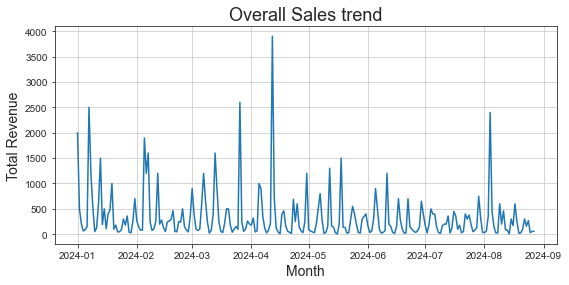

In [9]:
# Aggregate Sales by Date
monthly_sales = df.groupby(
               'Date')['Total_Revenue'].\
                sum().reset_index()

# Set a different style
sns.set_style('ticks')

# Define figure size
plt.figure(figsize=(9, 4))

# Plot the aggregated sales by date
plt.plot(monthly_sales['Date'], 
         monthly_sales['Total_Revenue'])

# Set the plot title and labels
plt.title('Overall Sales trend', 
          fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(True)
plt.show()

By grouping the sales by month we get **additional insights** regarding the **monthly trends over entire period**.

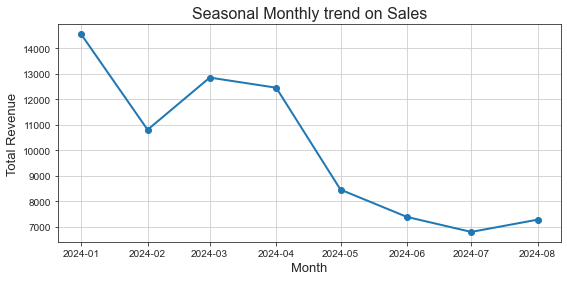

In [10]:
# Group sales by month
monthly_sales = df.groupby(
               'Month')['Total_Revenue'].\
                sum().reset_index()
 
# Convert month to timestamp
monthly_sales['Month'] = monthly_sales['Month'].\
                dt.to_timestamp()

#Set the style
sns.set_style('ticks')

# Set figure size
plt.figure(figsize=(9, 4))

# Plot the aggregated sales by month
plt.plot(monthly_sales['Month'], 
         monthly_sales['Total_Revenue'], 
         marker='o', linewidth=2.0)

# Set plot title and labels
plt.title('Seasonal Monthly trend on Sales', 
          fontsize=16)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Revenue', fontsize=13)
plt.grid(True)
plt.show()

**The overall sales volume fluctuated** over the entire time span, **reaching its highest point in April**.

**The monthly trend** shows a decline in sales in January, followed by a **good increase between February and April**.
After April sales continue to decrease to the **lowest point in July** then start to **pick up again in August**. 


Next we'll create a **pivot table** to find out **what are the monthly sales for each product category**. 

In [11]:
# Create a pivot table with Sales as values, 
# Month as index and Category as columns

pivot_table = pd.pivot_table(df.reset_index(),
        values='Total_Revenue',
        index='Month', 
        columns='Product_Category', 
        aggfunc='sum')
pivot_table

Product_Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Month,,,,,,
2024-01,699.95,308.86,1789.84,7999.90,2169.94,1579.83
2024-02,331.98,422.91,1284.81,2899.88,2869.92,2993.87
2024-03,417.00,252.83,1009.76,4499.90,5059.91,1609.84
2024-04,201.48,220.85,769.80,6709.91,1989.85,2559.80
2024-05,127.30,149.87,829.88,4198.96,1989.82,1159.66
2024-06,209.49,149.86,579.45,3599.93,1479.89,1365.93
2024-07,464.00,163.88,1095.48,2006.97,1417.87,1648.88
2024-08,170.70,192.87,769.91,3066.96,1668.96,1408.71


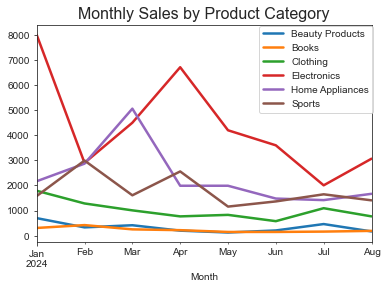

In [12]:
# Set a style
sns.set_style('ticks')

# Plot the pivot table
pivot_table.plot(linewidth=2.5)

# Set title and legend
plt.title("Monthly Sales by Product Category",
         fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 1.02))

**Electronics** sales **decline** sharply from **January to February**. They increase in March reaching their 
**highest peak in April**, then decrease steadily until August.

**Home Appliances sales** grew steadily from January, achieve their **highest value in March**, then decline towards the 
end of the period.

**Sports** sales reached a **peak**, in **February**, then again in **April**, but **decline** towards **August**.

The sales for **Clothing**, **Books** and **Beauty Products** remain almost **constant** for **all months**.

### 2. Which product categories have the highest sales?

Text(0.5, 1.0, 'Product Categories with highest Sales')

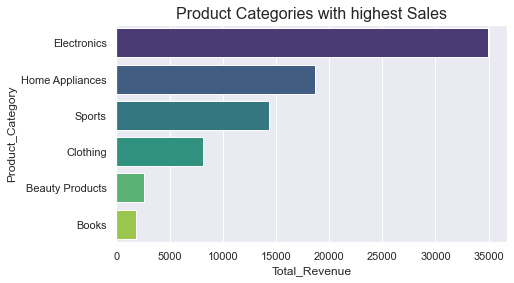

In [13]:
# Aggregate Sales by Product Category
top_products = df.groupby(
              'Product_Category')['Total_Revenue'].\
              sum().sort_values(ascending=False)

# Define figure size
sns.set(rc={"figure.figsize":(7, 4)}) 

# Display barplot
sns.barplot(x=top_products, 
            y=top_products.index,
           palette="viridis")

# Give the plot a title
plt.title('Product Categories with highest Sales', 
          fontsize=16)

The **highest sales** come from **Electronics**. **Home Appliances** and **Sports** have **almost half** of the **Electronics** 
volume sales, while **Clothing**, **Beauty Products**, and **Books** make up for **smaller proportions**.

We also want to find out which are the **top Units Sold** by **Product Category**.

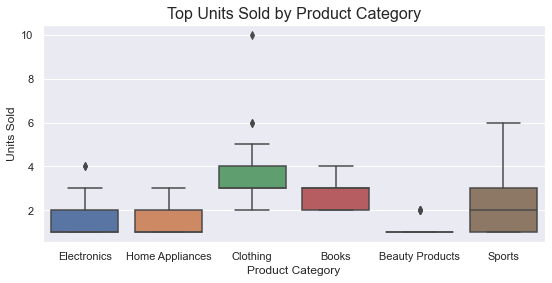

In [14]:
# Top Units Sold by Product Category

# Set style
sns.set_style('darkgrid')

# Define figure size
plt.figure(figsize=(9, 4))
sns.boxplot(x='Product_Category',
            y='Units_Sold',
            data=df)

# Define plot title and labels 
plt.title('Top Units Sold by Product Category',
         fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks()
plt.show()

The **top** number of **Units Sold** are for **Clothing** products, **followed** by **Sports**. A smaller number of units sold 
are for Home Appliances and Electronics.

### 3. Which product categories are most popular in each region?

We'll look first which region has the highest sales.

In [15]:
# Sales by Region

# Groupby sales by region
sales_region = df.groupby('Region')['Total_Revenue'].\
              sum().sort_values(ascending=False)
sales_region

Region
North America    36844.34
Asia             22455.45
Europe           21268.06
Name: Total_Revenue, dtype: float64

**North America** has the **highest sales volume**, **followed by Asia and Europe**.

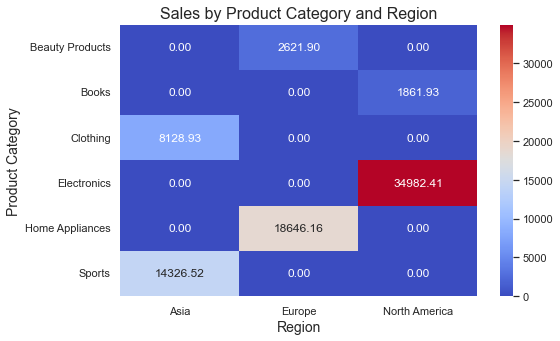

In [16]:
# Pivot table of sales, categories and region
heatmap_data = df.pivot_table(
            values='Total_Revenue',
            index='Product_Category', 
            columns='Region', 
            aggfunc='sum', 
            fill_value=0)

# Define figure size
plt.figure(figsize=(8, 5))

# Display heatmap
sns.heatmap(heatmap_data, 
            annot=True,
            fmt='.2f', 
            cmap='coolwarm')

# Set title and labels
plt.title('Sales by Product Category and Region', 
          fontsize=16)
plt.xlabel('Region', 
           fontsize=14)
plt.ylabel('Product Category', 
           fontsize=14)
plt.show()

We observe a **strong positive correlation** between **regions** and different **product categories**. 

The **highest sales volume** comes from **Electronics** in **North America**, followed by **Home Appliances** in **Europe** and
**Sports** in **Asia**.

Other popular products are **Clothing** in **Asia**, **Beauty Products** in **Europe** and **Books** in **North America**.

### 4. What is the distribution of payment methods?

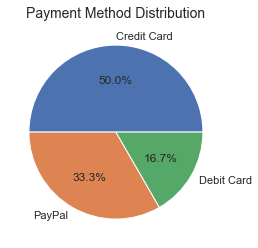

In [17]:
# Payment Method Distribution

# Set figure size
plt.figure(figsize=(4,4))

# Plot a pie chart of payment methods
df['Payment_Method'].value_counts().plot(kind='pie', 
        autopct='%1.1f%%')

# Set plot title and labels
plt.title('Payment Method Distribution',
         fontsize=14)
plt.ylabel('')
plt.show()

The pie chart shows that the **highest revenue** comes from using **Credit Cards (50%)**, followed by **PayPal(33.3%)** and **Debit Card (16.7%)**.

We also want to know which is the **most popular payment method by region**. 

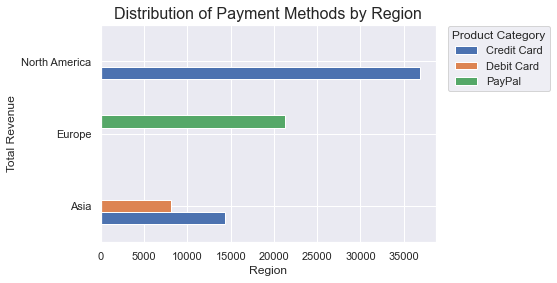

In [18]:
# Aggregate Sales by Region and Payment Methods
payment_region = df.groupby(
                ['Region', 'Payment_Method']
                )['Total_Revenue'].\
                sum().unstack()

# Set darkgrid style
sns.set_style('darkgrid')

# Barplot of payment method by region
payment_region.plot(kind='barh', 
                    figsize=(6, 4))

# Set plot title, labels and legend
plt.title('Distribution of Payment Methods by Region', 
          fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category', 
           bbox_to_anchor=(1.02, 1.02))
plt.show()

The **most used payment method** in **North America** is **Credit Card**, then comes **Europe** where is **mostly** used 
**PayPal**. 

**Asia** is the only region where are used **two payment methods, Credit and Debit Cards**.